<a href="https://colab.research.google.com/github/05-02-utkarsh/CODE-SNIPPETS/blob/main/STOCK%20PREDICTION%20LSTM_Improved_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,294.607971,297.449597,293.588891,295.842594,1963682
1,2010-01-05,294.686249,297.704255,292.608928,295.920895,2014488
2,2010-01-06,288.023102,294.823417,287.298007,294.686221,3349176
3,2010-01-07,280.007751,289.806455,278.675118,288.277847,6474892
4,2010-01-08,274.285278,281.614713,272.991854,280.634842,6048178


In [6]:
# Flatten MultiIndex columns to single level
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Now drop the 'Date' and 'Adj Close' columns
df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')  # errors='ignore' to avoid errors if columns are not present

# Show the updated dataframe
df.head()


,Close TCS.NS,High TCS.NS,Low TCS.NS,Open TCS.NS,Volume TCS.NS
0,294.607971,297.449597,293.588891,295.842594,1963682
1,294.686249,297.704255,292.608928,295.920895,2014488
2,288.023102,294.823417,287.298007,294.686221,3349176
3,280.007751,289.806455,278.675118,288.277847,6474892
4,274.285278,281.614713,272.991854,280.634842,6048178


Visualizing Closing Price

Index(['CloseTCS.NS', 'HighTCS.NS', 'LowTCS.NS', 'OpenTCS.NS', 'VolumeTCS.NS'], dtype='object')


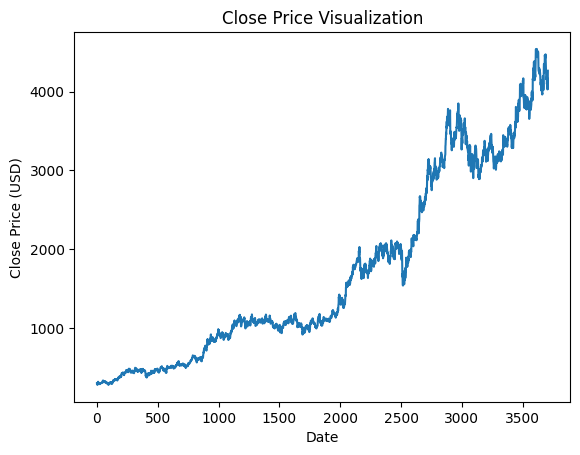

In [9]:
# Flatten MultiIndex columns to single level and remove extra spaces
df.columns = [' '.join(col).strip().replace(' ', '') for col in df.columns.values]

# Check the updated column names
print(df.columns)

# Plot the Close price visualization using the cleaned column name
plt.title("Close Price Visualization")
plt.plot(df['CloseTCS.NS'])  # Use the cleaned column name without spaces
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()


In [10]:
df

,CloseTCS.NS,HighTCS.NS,LowTCS.NS,OpenTCS.NS,VolumeTCS.NS
0,294.607971,297.449597,293.588891,295.842594,1963682
1,294.686249,297.704255,292.608928,295.920895,2014488
2,288.023102,294.823417,287.298007,294.686221,3349176
3,280.007751,289.806455,278.675118,288.277847,6474892
4,274.285278,281.614713,272.991854,280.634842,6048178
...,...,...,...,...,...
3703,4095.000000,4149.649902,4066.399902,4105.500000,2085593
3704,4028.300049,4140.350098,4011.550049,4114.950195,2669054
3705,4108.399902,4126.000000,4017.750000,4034.899902,2181277
3706,4038.850098,4137.750000,4025.300049,4101.000000,2392472


# Plotting moving averages of 100 day

---



In [12]:
# Calculate the 100-day moving average for the 'CloseAAPL' column
ma100 = df['CloseTCS.NS'].rolling(100).mean()

# Display the moving average
print(ma100)


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3703    4270.378564
3704    4268.794202
3705    4267.030232
3706    4263.365706
3707    4261.231477
Name: CloseTCS.NS, Length: 3708, dtype: float64


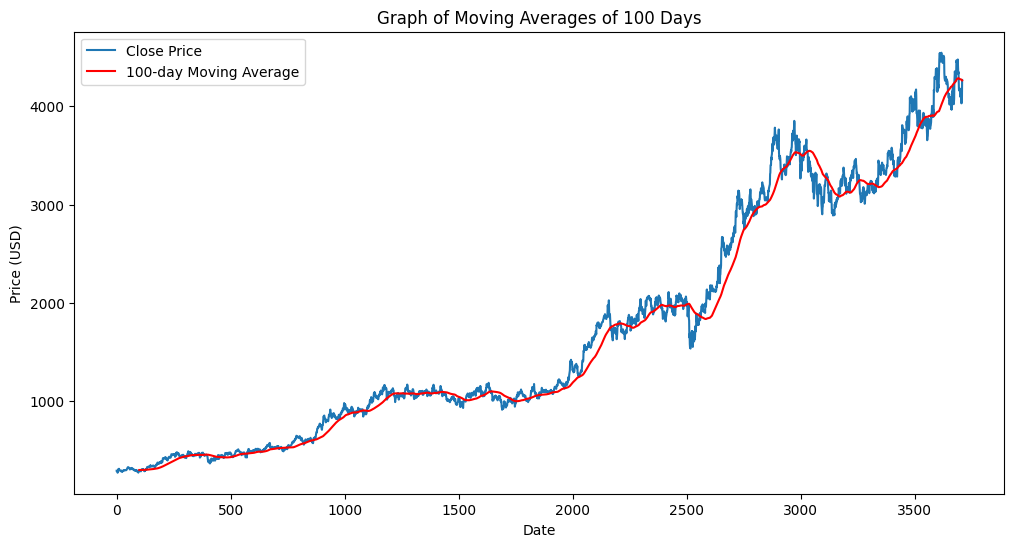

In [14]:
# Plot Close Price and 100-day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['CloseTCS.NS'], label='Close Price')  # Use 'CloseAAPL' instead of 'Close'
plt.plot(ma100, 'r', label='100-day Moving Average')
plt.title('Graph of Moving Averages of 100 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [15]:
# Calculate the 200-day moving average for the 'CloseAAPL' column
ma200 = df['CloseTCS.NS'].rolling(200).mean()

# Display the moving average
print(ma200)


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3703    4108.332861
3704    4107.687277
3705    4107.384635
3706    4107.064015
3707    4108.742944
Name: CloseTCS.NS, Length: 3708, dtype: float64


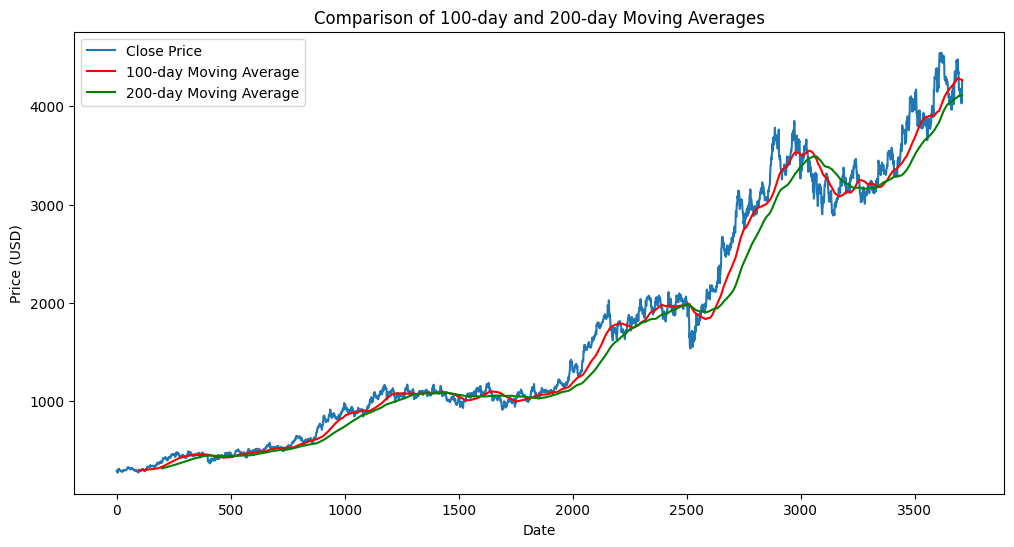

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['CloseTCS.NS'], label='Close Price')
plt.plot(ma100, 'r', label='100-day Moving Average')
plt.plot(ma200, 'g', label='200-day Moving Average')
plt.title('Comparison of 100-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [19]:
df.shape

(3708, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [20]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2595, 6)
(1113, 6)


In [21]:
train.head()

,Date,Close TCS.NS,High TCS.NS,Low TCS.NS,Open TCS.NS,Volume TCS.NS
0,2010-01-04,294.607971,297.449597,293.588891,295.842594,1963682
1,2010-01-05,294.686249,297.704255,292.608928,295.920895,2014488
2,2010-01-06,288.023102,294.823417,287.298007,294.686221,3349176
3,2010-01-07,280.007751,289.806455,278.675118,288.277847,6474892
4,2010-01-08,274.285278,281.614713,272.991854,280.634842,6048178


In [22]:
test.head()

,Date,Close TCS.NS,High TCS.NS,Low TCS.NS,Open TCS.NS,Volume TCS.NS
2595,2020-07-16,2108.624268,2201.329194,2094.801182,2117.352212,8582118
2596,2020-07-17,2076.542969,2117.257555,2066.446907,2110.747073,4509135
2597,2020-07-20,2083.289307,2101.216975,2067.154543,2076.778825,2952646
2598,2020-07-21,2099.471191,2112.303487,2076.919937,2104.141774,2665286
2599,2020-07-22,2067.296631,2105.086326,2060.927589,2105.086326,2861534


# Using MinMax scaler for normalization of the dataset

---



In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [25]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01067128],
       [0.01071324],
       [0.01005152],
       ...,
       [0.97224895],
       [0.96720338],
       [0.95458901]])

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(2495, 100, 1)

# ML Model (LSTM)

---



In [28]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [31]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - loss: 0.0937 - mean_absolute_error: 0.2170
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0112 - mean_absolute_error: 0.0724
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0073 - mean_absolute_error: 0.0588
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0082 - mean_absolute_error: 0.0633
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0068 - mean_absolute_error: 0.0572
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0061 - mean_absolute_error: 0.0522
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0056 - mean_absolute_error: 0.0504
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0048 - mean_absolute_error: 0.0464
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0045 - mean_absolute_error: 0.0451
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0043 - mean_absolute_error: 0.0450
Epoch 11/100
78/78 ━━━━━━━━

In [32]:
model.save('keras_model.h5')

In [33]:
test_close.shape

(1113, 1)

In [34]:
past_100_days = pd.DataFrame(train_close[-100:])

In [35]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [37]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [ ]:
final_df.head()

,0
0,2000.000000
1,2016.800049
2,1982.599976
3,1989.750000
4,1994.300049


In [38]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18808849],
       [0.1889899 ],
       [0.19373831],
       ...,
       [0.8290875 ],
       [0.8504047 ],
       [0.88233206]])

In [39]:
input_data.shape

(1213, 1)

# Testing the model

---



In [40]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1113, 100, 1)
(1113,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [42]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


In [44]:
y_pred.shape

(1113, 1)

In [45]:
y_test

array([0.21068095, 0.2085508 , 0.19759608, ..., 0.8290875 , 0.8504047 ,
       0.88233206])

In [46]:
y_pred

array([[0.24042125],
       [0.24410152],
       [0.24747749],
       ...,
       [0.84846914],
       [0.84681016],
       [0.84388447]], dtype=float32)

In [47]:
scaler.scale_

array([0.0003225])

In [48]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

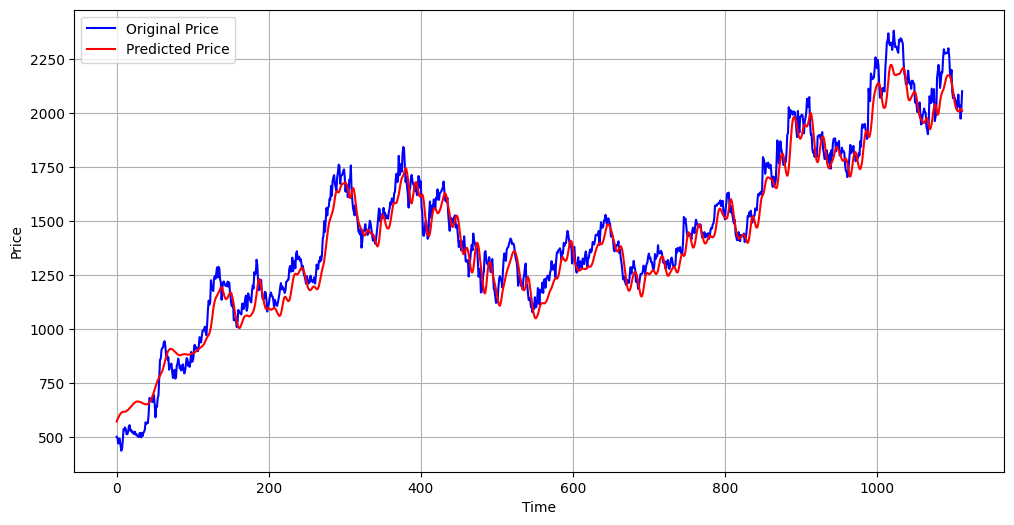

In [49]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.40%


Calculation of R2 score

In [51]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9607911351448525


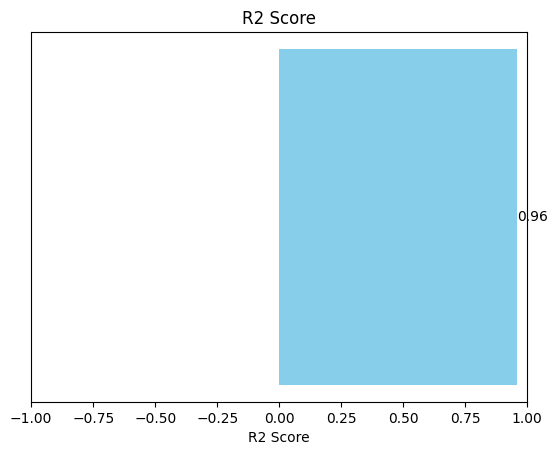

In [52]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

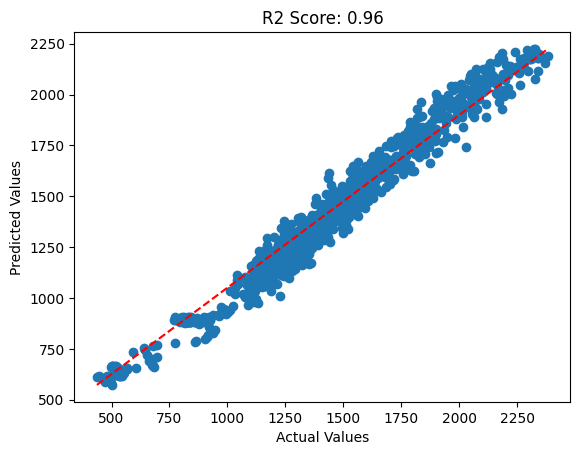

In [53]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()